In [ ]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
xsmb = pd.read_csv("XSMB_final.csv")

In [ ]:
xsmb.head(5)

KQ        Date
0  91386  2021-11-07
1  19821  2021-11-06
2  66152  2021-11-05
3  34148  2021-11-04
4   7267  2021-11-03

In [ ]:
xsmb['odd'] = xsmb['KQ'].apply(lambda x: 0 if x%2==0 else 1)

In [ ]:
xsmb.head()

KQ        Date  odd
0  91386  2021-11-07    0
1  19821  2021-11-06    1
2  66152  2021-11-05    0
3  34148  2021-11-04    0
4   7267  2021-11-03    1

In [ ]:
xsmb_odd_even = xsmb.groupby('odd').count().reset_index()

In [ ]:
xsmb_odd_even


odd    KQ  Date
0    0  3779  3779
1    1  3721  3721

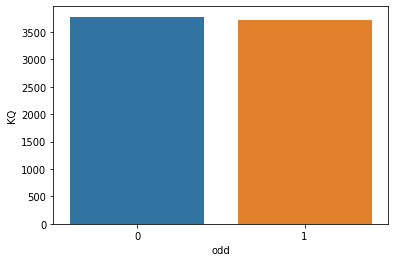

In [ ]:
sns.barplot(data=xsmb_odd_even, x= 'odd', y='KQ')

In [ ]:
xsmb['last2digit'] = xsmb['KQ'].apply(lambda x: int(str(x)[-2:]))

In [ ]:
xsmb

KQ        Date  odd  last2digit Day of week
0  91386  2021-11-07    0          86      Sunday
1  19821  2021-11-06    1          21    Saturday
2  66152  2021-11-05    0          52      Friday
3  34148  2021-11-04    0          48    Thursday
4   7267  2021-11-03    1          67   Wednesday

<Figure size 1800x576 with 0 Axes>

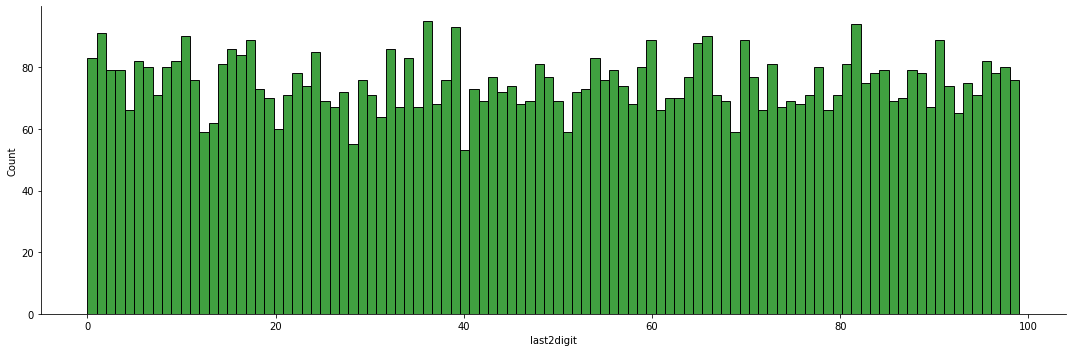

In [ ]:
plt.figure(figsize=(25,8))
sns.displot(xsmb['last2digit'], bins=100, height=5, aspect=3, color='green')
plt.tight_layout()

In [ ]:
xsmb['last2digit'].value_counts()

36    95
82    94
39    93
1     91
66    90
      ..
51    59
12    59
69    59
28    55
40    53
Name: last2digit, Length: 100, dtype: int64

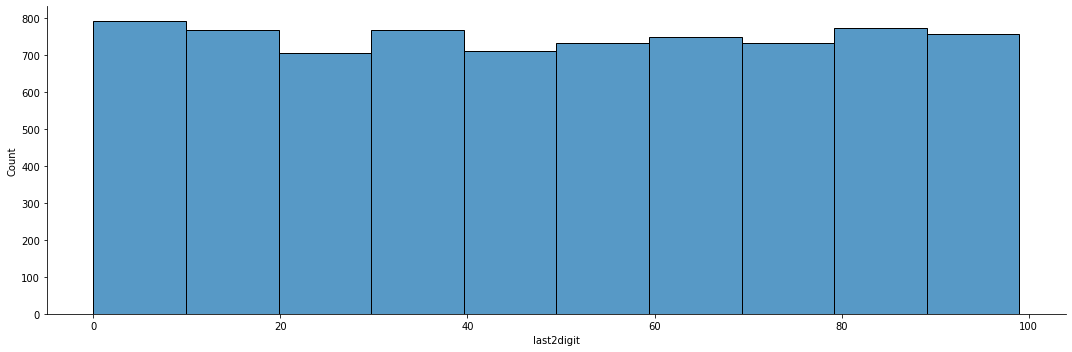

In [ ]:
sns.displot(xsmb['last2digit'], bins=10, height=5, aspect=3)
plt.tight_layout()

In [ ]:
list = []
for i in xsmb['Date']:
  list.append(pd.Timestamp(i).day_name())
  


In [ ]:
xsmb['Day of week'] = list

In [ ]:
xsmb

KQ        Date  odd  last2digit Day of week
0     91386  2021-11-07    0          86      Sunday
1     19821  2021-11-06    1          21    Saturday
2     66152  2021-11-05    0          52      Friday
3     34148  2021-11-04    0          48    Thursday
4      7267  2021-11-03    1          67   Wednesday
...     ...         ...  ...         ...         ...
7495  20372  1981-08-14    0          72      Friday
7496  64134  1981-08-13    0          34    Thursday
7497  55355  1981-08-12    1          55   Wednesday
7498  98481  1981-08-11    1          81     Tuesday
7499  11602  1981-08-10    0           2      Monday

[7500 rows x 5 columns]

In [ ]:
xsmb[(xsmb["Day of week"] == "Sunday")]

KQ        Date  odd  last2digit Day of week
0     91386  2021-11-07    0          86      Sunday
7     54798  2021-10-31    0          98      Sunday
14    44417  2021-10-24    1          17      Sunday
21    24640  2021-10-17    0          40      Sunday
28     6085  2021-10-10    1          85      Sunday
...     ...         ...  ...         ...         ...
7465  13295  1981-09-13    1          95      Sunday
7472  73025  1981-09-06    1          25      Sunday
7479  63565  1981-08-30    1          65      Sunday
7486  52792  1981-08-23    0          92      Sunday
7493  24785  1981-08-16    1          85      Sunday

[1071 rows x 5 columns]

In [ ]:
len(xsmb[(xsmb["Day of week"] == "Sunday") & (xsmb["last2digit"] == 27)])

9

In [ ]:
df = pd.DataFrame(columns=['Day of week', 'value', 'occurence'])
for i in range(100):
  df.loc[i] = ['Sunday'] + [str(i)] + [str(len(xsmb[(xsmb["Day of week"] == "Sunday") & (xsmb["last2digit"] == i)]))]



In [ ]:
df

Day of week value occurence
0       Sunday     0         8
1       Sunday     1        12
2       Sunday     2        11
3       Sunday     3         9
4       Sunday     4         6
..         ...   ...       ...
95      Sunday    95        13
96      Sunday    96        13
97      Sunday    97        18
98      Sunday    98        13
99      Sunday    99         8

[100 rows x 3 columns]

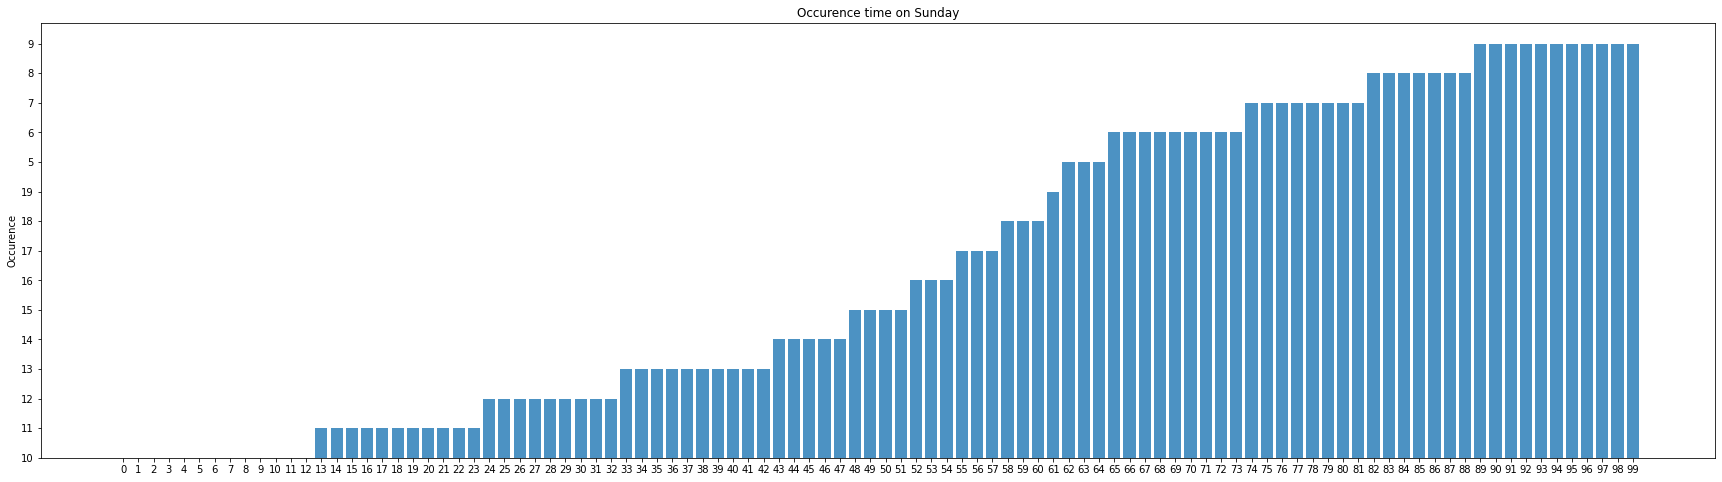

In [76]:
plt.figure(figsize=(30,8))
objects = []
for i in range(0, 100):
  objects.append(i)
y_pos = df['value']
x_pos = df['occurence'].sort_values()
plt.bar(y_pos, x_pos, align='center', alpha=0.8)
plt.xticks(y_pos, objects)
plt.ylabel('Occurence')
plt.title('Occurence time on Sunday')

plt.show()